# fastText y clustering espectral

fasText es un método, creado por Facebook, para generar representaciones vectoriales de palabras (embeddings). Es similar a Word2Vec pero tiene la característica de modelar no sólo palabras completas sino también subcadenas (subwords). Gracias a esto, y a la noción  de "composición", puede construir la representación de una palabra que nunca vio en el entrenamiento, a partir de la combinación de l representaciones de sus partes/subcadenas. 

En este notebook entrenaremos representaciones fastText a partir de un corpus en español y posteriormente realizaremos agrupamiento usando la técnica de clustering espectral.


## 1. Representación vectorial de palabras con fastText

Vamos a instalar fastText de manera nativa usando el repositorio de github y la línea de comandos:



In [0]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
!unzip v0.9.1.zip
%cd fastText-0.9.1
!make

--2019-08-19 16:34:13--  https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.9.1 [following]
--2019-08-19 16:34:19--  https://codeload.github.com/facebookresearch/fastText/zip/v0.9.1
Resolving codeload.github.com (codeload.github.com)... 13.229.189.0
Connecting to codeload.github.com (codeload.github.com)|13.229.189.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.9.1.zip’

v0.9.1.zip              [         <=>        ]   4.13M  2.18MB/s    in 1.9s    

2019-08-19 16:34:22 (2.18 MB/s) - ‘v0.9.1.zip’ saved [4327207]

Archive:  v0.9.1.zip
b5b7d307274ce00ef52198fbc692ed3bd11d9856
   creating: fastText-0.9.1/
   creating: fastText-0.9.1/.circleci/
  inflating: fastText

Una vez instalado fasText, podemos empezar a entrenar modelos de representaciones vectoriales a partir de un corpus.

Montamos el sistema de archivos de Drive:


In [0]:
#Montamos el contenido de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Para entrenar el método de Fasttext, utilizaremos la combinación de dos corpus pequeños: a) el Corpus del Español Mexicano COntemporáneo (CEMC); y b) el corpus paralelo náhuatl-español Axolotl (la parte en español). 


El entrenamiento se hace a través de la línea de comandos, se pueden específicar diversos hiperparámetros ([Consultar documentación](https://fasttext.cc/docs/en/unsupervised-tutorial.html)). Dos parámetros necesarios son el archivo input y el archivo output, que generará el entrenamiento.

In [0]:
#Se generan dos archivos: cemc.bin (modelo) y cemc.vec (este último es literalmente un archivo de texto con un vector por línea)
#Se pueden descargar usando el visualizador de archivos (pestaña izq.) fastText-0.9.1/result
!mkdir result 
!./fasttext cbow -input /content/drive/My\ Drive/Curso_RIIAA/data/cemcytodo.txt  -output result/cemc

/bin/bash: ./fasttext: No such file or directory


Una vez generado el modelo, podemos utilizar estos vectores de diferentes maneras, por ejemplo para una palabra devolver las palabras más cercanas/similares:










In [0]:
!./fasttext nn result/cemc.bin

Query word? mole
atole 0.975429
metate 0.946135
tomate 0.943589
ole 0.939852
échale 0.937425
huele 0.935428
hule 0.934699
híjole 0.932914
late 0.930711
jitomate 0.92915
Query word? ^C


#2. Cargando los vectores en Python
Podemos cargar los modelos obtenidos de Fasttext y manipularlos directamente desde python, utilizando el paquete gensim.

In [0]:
# Install / Upgrade Gensim
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 42.0MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Cargamos el modelo:

In [0]:
from gensim.models.wrappers import FastText

#Carga modelo pre-entrenado
model = FastText.load_fasttext_format('result/cemc')


Una vez cargado el modelo podemos jugar con los vectores directamente desde python. Aquí también se pueden buscar palabras similares o bien determinar la similitud entre una y otra palabra:


In [0]:
#Buscar las palabras más similares a query
print(model.most_similar('azteca'))
print(model.most_similar('mexicano'))

#Similitud entre dos palabras dasdas
print(model.similarity('mexico', 'país'))

[('zapoteca', 0.9707117676734924), ('barbilla', 0.9341251850128174), ('polla', 0.9327656626701355), ('chilena', 0.9314919114112854), ('azuela', 0.9312282800674438), ('orilla', 0.9310535192489624), ('bonilla', 0.9304966330528259), ('zorrilla', 0.9283484220504761), ('borbolla', 0.9271571040153503), ('chueca', 0.9267408847808838)]
[('americano', 0.9683598279953003), ('mexico', 0.9493384957313538), ('norteamericano', 0.9465785622596741), ('africano', 0.933608889579773), ('republicano', 0.9239773750305176), ('mexicanismo', 0.9033154249191284), ('latinoamericano', 0.9010395407676697), ('universitario', 0.9005328416824341), ('organizador', 0.8923201560974121), ('italiano', 0.8891371488571167)]
0.3114357


Una de las ventajas de fastText es que, además de obtener los vectores de palabras que se encontraban en el vocabulario de entrenamiento, es capaz de construir representaciones vectoriales de palabras que no estaban en este vocabulario (*Out-Of-Vocabulary words, OOV*). Esto se realiza a través de una operación de composición de subwords.

In [0]:
#Palabra dentro del vocabulario
existent_word = "computadora"
print(existent_word in model.wv.vocab)
#Obtención del vector de esta palabra
vector_computadora = model.wv[existent_word]

#Palabra oov
oov_word = "computadorsota"
print(oov_word in model.wv.vocab)
#Obtención del vector de oov
vector_oov = model.wv[oov_word]

#Similitud entre ambos
print(model.similarity(existent_word, oov_word))

True
False
0.96310055


#3. Agrupamiento con spectral clustering

Una vez obtenidos los vectores de Fasttext, podemos aplicar el algoritmo de spectral clustering, vamos a agrupar y visualizar los datos obtenidos.

In [0]:
#Paquetería necesaria
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import networkx as nx
from scipy.linalg import eig
from operator import itemgetter

Dado que Fasttext permite representar palabras OOV, podemos darle cualquier lista arbitraría de léxico y obtener vectores que los representen.

In [0]:
#Lista de palabras para trabajar
vocab_words = ['amo','amas','amamos','ama','aman','come','como','comemos','comen','toco','tocas','tocan','tocamos','gato','minino','gatito','gatos','mininos',
               'flor','flores','mininito','computadora','computadoras']

Obtenemos los vectores que representan a las palabras anteriores y los guardamos en un arreglo.

In [0]:
#Tamaño del vocabulario
N = len(vocab_words)

#Matrix de NxNúmero de dimmensiones
X = np.zeros((N,100))
#Llenamos la matriz con los vectores palabra
for i,w in enumerate(vocab_words):
  X[i] = model.wv[w]

print(X.shape)

(23, 100)


Podemos visualizar estos datos a partir de la siguiente función:

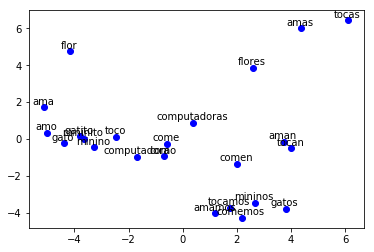

In [0]:
#Función para plotear
def plot_words(Z,ids,color='blue'):
    #Reduce a dos dimensiones con PCA
    Z = PCA(n_components=2).fit_transform(Z)
    r=0
    #Plotea las dimensiones
    plt.scatter(Z[:,0],Z[:,1], marker='o', c=color)
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        #Agrega las etiquetas
        plt.annotate(label, xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1

#Ploteo de los datos
plot_words(X, vocab_words)
plt.show()

A partir de la matriz de vectores, aplicaremos el algoritmo de spectral clustering. Para esto, crearemos una matriz de adyacencia que represente al grafo. Utilizaremos la siguiente función kernel para cuantificar la similitud entre dos vectores $$k(u,v) = \frac{1}{||u-v||+1}$$
Además, utilizaremos un planteamiento de k-nearest graph, donde sólo consideraremos adyacentes los k-vecinos más cercanos.

In [0]:
#Matriz de adyacencia
A = np.zeros((N,N))

for k,u in enumerate(X):
  #Vecinos de u, con sus distancias
  candidates_for_k = {}
  
  for j,v in enumerate(X):
    #Distancia euclideana
    dist = np.linalg.norm(u-v)
    #Guarda la distancia de los  vecinos
    candidates_for_k[j] = dist
    
  #Ordena los vecinos por distancia  
  neighbors = sorted(candidates_for_k.items(), key=itemgetter(1))
  #El primer vecino es siempre el mismo nodo (||u-u||=0)
  neighbors.pop(0)
  
  #Toma los 1-vecinos más cercanos
  nn = neighbors[:1]
  
  for neigh, weight in nn:
    #Llena la matriz de adyacencia
    A[k,neigh] = 1./(weight+1) 
    A[neigh,k] = 1./(weight+1) 

print(A.shape)      

(23, 23)


In [0]:
#Se comprueba que la matriz sea simétrica
print((A == A.T).all())

True


Podemos visualizar la matriz de adyacencia en un formato de tabla:

In [0]:
#Formato de tabla con Pandas
df = pd.DataFrame(A, index=vocab_words, columns=vocab_words)
print(df.to_string())

                   amo      amas    amamos       ama      aman      come      como   comemos     comen      toco    tocas     tocan   tocamos      gato    minino    gatito     gatos   mininos      flor    flores  mininito  computadora  computadoras
amo           0.000000  0.000000  0.000000  0.143727  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.161970  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000      0.000000
amas          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.16533  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.139763  0.000000     0.000000      0.000000
amamos        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.322724  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000      0.000000
ama 

También podemos visualizar el grafo en formato de red:

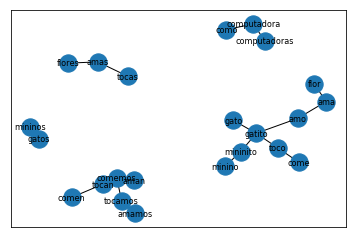

In [0]:
#Indexado de labels
edges = {i:dat for i,dat in enumerate(vocab_words)}

#Formato de red con Networkx
nx.draw_networkx(nx.from_numpy_array(A), with_labels=True, labels=edges, font_size=8)

Ya que hemos obtenido la matriz de adyacencia, podemos calcular la matriz Laplaciana y obtener su descomposición espectral.

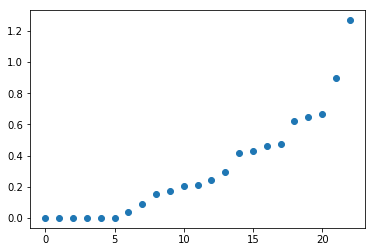

In [0]:
#Se obtiene la matriz Laplaciana
L = np.diag(A.sum(0)) - A

#Se calculan los eigen valores y eigen vectores de L
eig_vals, eig_vecs = eig(L)

#Se ordenan con respecto a los eigenvalores
values = sorted(zip(eig_vals.real,eig_vecs), key=itemgetter(0))

#Obtenemos ambos eigens
vals, vecs = zip(*values)

#Se crea una matriz de eigenvectores
matrix = np.array(vecs)

#Visualización de eigenvalores
plt.plot(np.array(vals),'o')
plt.show()

Tomamos, entonces, los k eigenvectores que mejor representen nuestros datos y así podemos visualizar los resultados obtenidos con la función de ploteo que hemos definido más arriba.

(23, 12)


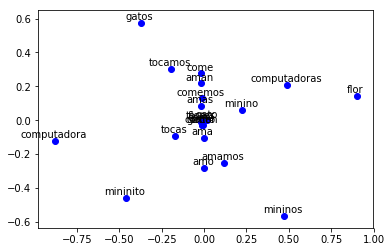

In [0]:
#Obtiene la matriz de eigenvectores laplacianos
X_hat = matrix[5:17].T.real

#Ploteo de datos
print(X_hat.shape)
plot_words(X_hat,vocab_words)
plt.show()

Finalmente, aplicamos k-medias para descubrir grupos en los datos proyectados:

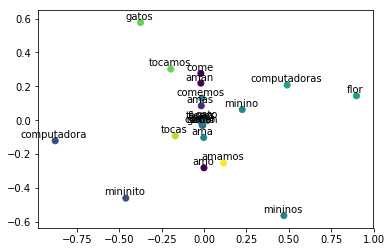

In [0]:
#Número de centroides
centroids=10
#Aplicación de kmenas
kmeans = KMeans(n_clusters=centroids).fit(X_hat)

#Obtención de los clusters
pred_lables = kmeans.predict(X_hat)

#Plot de clusters
plot_words(X_hat, vocab_words, color=pred_lables)
plt.show()


---

### Alternativa opcional

Se puede aplicar Fasttext a una fracción de corpus real de Wikipedia en inglés (muy tardado entrenar)


In [0]:
!mkdir data
!wget -c http://mattmahoney.net/dc/enwik9.zip -P data
!unzip data/enwik9.zip -d data


--2019-08-15 21:52:28--  http://mattmahoney.net/dc/enwik9.zip
Resolving mattmahoney.net (mattmahoney.net)... 67.195.197.75
Connecting to mattmahoney.net (mattmahoney.net)|67.195.197.75|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322592222 (308M) [application/zip]
Saving to: ‘data/enwik9.zip’

enwik9.zip           18%[==>                 ]  57.90M   855KB/s    eta 5m 1s  ^C
Archive:  data/enwik9.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data/enwik9.zip or
        data/enwik9.zip.zip, and cannot find data/enwik9.zip.ZIP, period.


In [0]:
!perl wikifil.pl data/enwik9 > data/fil9

Can't open data/enwik9: No such file or directory at wikifil.pl line 12.


In [0]:
!mkdir result
!./fasttext cbow -input data/fil9 -output result/fil9

mkdir: cannot create directory ‘result’: File exists
Read 0M words
Number of words:  0
Number of labels: 0
terminate called after throwing an instance of 'std::invalid_argument'
  what():  Empty vocabulary. Try a smaller -minCount value.
